# Testing Q4 Left-Right compensation for BBCW

Optics file: `optics_repository/runIII/RunIII_dev/2021_V6/PROTON/opticsfile.30`

Knobs coefficients for QFF were computed separately but can be modified in `bbcw.py/QFF_RECIPE`


## Beam 1

Output()

Output()

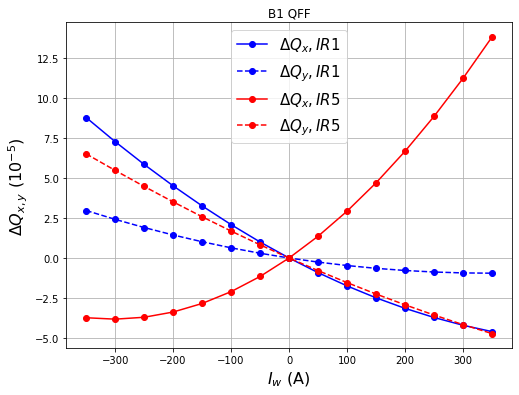

In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from rich.progress import track as pbar
import json

import xobjects as xo
import xtrack as xt
import xpart as xp


# CHOOSING BEAM
#===================================================
beam = 'b1'


# Setting up Tracking
#===================================================
fname_line_particles= f'xsuite_lines/006_{beam}_line_bb_wire.json'
with open(fname_line_particles, 'r') as fid:
    input_data = json.load(fid)
line = xt.Line.from_dict(input_data)
line.particle_ref = xp.Particles.from_dict(input_data['particle_on_tracker_co'])

tracker = xt.Tracker(line=line)
tw = tracker.twiss()
clear_output(wait=False) #to clear xtrack output

# Wire distance used for both IP and both beam
#===================================================
r_w = {'b1':  {'ip1':0.009195199050594374,
               'ip5':0.012371483207783397},
       'b2':  {'ip1':0.009195200021016113,
               'ip5':0.012371484908716562}}[beam]

# Activating QFF compensation
#===================================================
tracker.vars['enable_qff'] = 1


# Going through both IPs and powering the wires
#===================================================
tuneShifts = {}
for IP in ['ip1','ip5']:
    tracker.vars[f"bbcw_rw_{IP}.{beam}"] = r_w[IP]

    #=============================================================
    #Initialize values
    tracker.vars[f"bbcw_i_ip1.{beam}"] = 0
    tracker.vars[f"bbcw_i_ip5.{beam}"] = 0

    

    # Extracting reference information
    tw = tracker.twiss()
    refQx,refQy =  tw['mux'][-1],tw['muy'][-1]

    
    # RAMPING UP CURRENT
    #=============================================================
    I_vec = np.linspace(-350,350,15)
    Qx = []
    Qy = []

    for I in pbar(I_vec):
        # Setting current value
        tracker.vars[f"bbcw_i_{IP}.{beam}"] = I
        
        # Measuring Tune
        _twiss = tracker.twiss()
        _Qx,_Qy =  _twiss['mux'][-1],_twiss['muy'][-1]

        Qx.append(_Qx)
        Qy.append(_Qy)
        

    # Saving results:
    tuneShifts[(IP,'x')] = np.array(Qx)-refQx
    tuneShifts[(IP,'y')] = np.array(Qy)-refQy

    
# Plotting
#===================================================
plt.figure(figsize=(8,6))
plt.title(f'{beam.upper()} QFF')
for IP,color in zip(['ip1','ip5'],['b','r']):
    plt.plot(I_vec,tuneShifts[(IP,'x')]/1e-5,'-o',color=color,label=rf'$\Delta Q_x, IR{IP[-1]}$')
    plt.plot(I_vec,tuneShifts[(IP,'y')]/1e-5,'--o',color=color,label=rf'$\Delta Q_y, IR{IP[-1]}$')

plt.grid(True)
plt.xlabel(r'$I_w$ (A)',fontsize=16)
plt.ylabel(r'$\Delta Q_{x,y}$ ($10^{-5}$)',fontsize=16)
plt.legend(fontsize=15)



## Beam 2

Output()

Output()

Need second attempt on closed orbit search

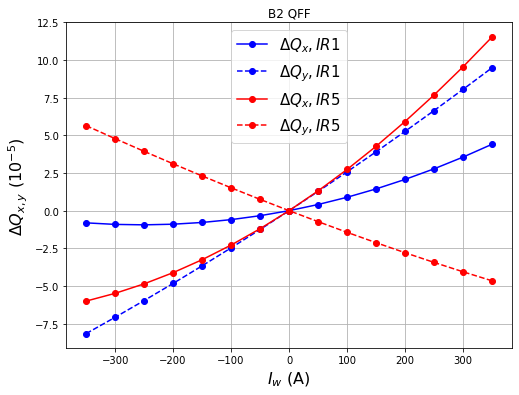

In [5]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from rich.progress import track as pbar
import json

import xobjects as xo
import xtrack as xt
import xpart as xp


# CHOOSING BEAM
#===================================================
beam = 'b2'


# Setting up Tracking
#===================================================
fname_line_particles= f'xsuite_lines/006_{beam}_line_bb_wire.json'
with open(fname_line_particles, 'r') as fid:
    input_data = json.load(fid)
line = xt.Line.from_dict(input_data)
line.particle_ref = xp.Particles.from_dict(input_data['particle_on_tracker_co'])

tracker = xt.Tracker(line=line)
tw = tracker.twiss()
clear_output(wait=False) #to clear xtrack output

# Wire distance used for both IP and both beam
#===================================================
r_w = {'b1':  {'ip1':0.009195199050594374,
               'ip5':0.012371483207783397},
       'b2':  {'ip1':0.009195200021016113,
               'ip5':0.012371484908716562}}[beam]

# Activating QFF compensation
#===================================================
tracker.vars['enable_qff'] = 1


# Going through both IPs and powering the wires
#===================================================
tuneShifts = {}
for IP in ['ip1','ip5']:
    tracker.vars[f"bbcw_rw_{IP}.{beam}"] = r_w[IP]

    #=============================================================
    #Initialize values
    tracker.vars[f"bbcw_i_ip1.{beam}"] = 0
    tracker.vars[f"bbcw_i_ip5.{beam}"] = 0

    

    # Extracting reference information
    tw = tracker.twiss()
    refQx,refQy =  tw['mux'][-1],tw['muy'][-1]

    
    # RAMPING UP CURRENT
    #=============================================================
    I_vec = np.linspace(-350,350,15)
    Qx = []
    Qy = []

    for I in pbar(I_vec):
        # Setting current value
        tracker.vars[f"bbcw_i_{IP}.{beam}"] = I
        
        # Measuring Tune
        _twiss = tracker.twiss()
        _Qx,_Qy =  _twiss['mux'][-1],_twiss['muy'][-1]

        Qx.append(_Qx)
        Qy.append(_Qy)
        

    # Saving results:
    tuneShifts[(IP,'x')] = np.array(Qx)-refQx
    tuneShifts[(IP,'y')] = np.array(Qy)-refQy

    
# Plotting
#===================================================
plt.figure(figsize=(8,6))
plt.title(f'{beam.upper()} QFF')
for IP,color in zip(['ip1','ip5'],['b','r']):
    plt.plot(I_vec,tuneShifts[(IP,'x')]/1e-5,'-o',color=color,label=rf'$\Delta Q_x, IR{IP[-1]}$')
    plt.plot(I_vec,tuneShifts[(IP,'y')]/1e-5,'--o',color=color,label=rf'$\Delta Q_y, IR{IP[-1]}$')

plt.grid(True)
plt.xlabel(r'$I_w$ (A)',fontsize=16)
plt.ylabel(r'$\Delta Q_{x,y}$ ($10^{-5}$)',fontsize=16)
plt.legend(fontsize=15)

